In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import itertools



import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="white")
%matplotlib inline


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
monthly = pd.read_csv('co2_mm_mlo.csv')

In [3]:
monthly

,year,month,decimal date,average,interpolated,trend,ndays,Unnamed: 7
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
751,2020,10,2020.7917,411.51,414.92,30,0.22,0.08
752,2020,11,2020.8750,413.11,415.14,27,0.80,0.29
753,2020,12,2020.9583,414.25,415.00,30,0.48,0.17
754,2021,1,2021.0417,415.52,415.26,29,0.44,0.16


In [4]:
weekly = pd.read_csv('co2_weekly_mlo.csv')

In [107]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 2441 non-null   int64         
 1   month                2441 non-null   int64         
 2   day                  2441 non-null   int64         
 3   decimal              2441 non-null   float64       
 4   average              2441 non-null   float64       
 5   ndays                2441 non-null   int64         
 6   1 year ago           2441 non-null   float64       
 7   10 years ago         2441 non-null   float64       
 8   increase since 1800  2441 non-null   float64       
 9   Date                 2441 non-null   datetime64[ns]
 10  Year                 2441 non-null   int64         
 11  Month                2441 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 229.0 KB


In [6]:
weekly.isna().sum()

year                   0
month                  0
day                    0
decimal                0
average                0
ndays                  0
1 year ago             0
10 years ago           0
increase since 1800    0
dtype: int64

In [7]:
weekly['Date'] = pd.to_datetime(weekly[['year', 'month', 'day']])

In [22]:
weekly

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800,Date
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60,1974-06-02
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06,1974-06-16
...,...,...,...,...,...,...,...,...,...,...
2436,2021,1,24,2021.0644,416.01,7,413.96,391.68,135.50,2021-01-24
2437,2021,1,31,2021.0836,417.12,7,414.50,392.19,136.49,2021-01-31
2438,2021,2,7,2021.1027,416.92,7,414.91,391.64,136.18,2021-02-07
2439,2021,2,14,2021.1219,416.51,7,414.12,391.92,135.67,2021-02-14


In [78]:
weekly['average'] = weekly['average'].abs()

In [26]:
years = weekly.loc[weekly['average'] == -999.99].index.values

In [28]:
years

array([  72,   81,   82,   83,   84,  110,  409,  412,  413,  481,  515,
        516,  517,  518, 1639, 1780, 1781, 1782])

In [29]:
for index in years:
    x1 = weekly.loc[index - 1, 'average']
    x2 = weekly.loc[index + 1, 'average']
    weekly.loc[index, 'average'] = (x1 + x2) / 2

In [90]:
below = weekly.loc[weekly['average'] < 250].index.values

In [91]:
below

array([], dtype=int64)

In [89]:
for index in below:
    x1 = weekly.loc[index - 1, 'average']
    x2 = weekly.loc[index + 1, 'average']
    weekly.loc[index, 'average'] = (x1 + x2) / 2

In [103]:
above = weekly.loc[weekly['average'] > 430].index.values

In [104]:
above

array([ 82, 516, 517, 518])

In [105]:
for index in above:
    x1 = weekly.loc[index - 1, 'average']
    x2 = weekly.loc[index + 1, 'average']
    weekly.loc[index, 'average'] = (x1 + x2) / 2

In [ ]:
inc1975=weekly.loc[[71, 73], 'increase since 1800'].mean() 
weekly.loc[[72, 81, 82, 83, 84], 'increase since 1800'] = inc1975 

inc1976=weekly.loc[[109,111], 'increase since 1800'].mean() 
weekly.loc[[110], 'increase since 1800'] = inc1976 

inc1982=weekly.loc[[411, 414], 'increase since 1800'].mean() 
weekly.loc[[409, 412, 413], 'increase since 1800'] = inc1982 

inc1983=weekly.loc[[480, 482], 'increase since 1800'].mean() 
weekly.loc[[481], 'increase since 1800'] = inc1983

inc1984=weekly.loc[[514, 519], 'increase since 1800'].mean() 
weekly.loc[[515, 516, 517, 518], 'increase since 1800'] = inc1984

inc2005=weekly.loc[[1638, 1640], 'increase since 1800'].mean() 
weekly.loc[[1639], 'increase since 1800'] = inc2005 

inc2008=weekly.loc[[1779, 1783], 'increase since 1800'].mean() 
weekly.loc[[1780, 1781, 1782], 'increase since 1800'] = inc2008

In [110]:
ppm1984 = weekly.loc[(weekly['average'] > 350) & (weekly['year'] == 1984)].index.values

In [129]:
mean1984 = weekly.loc[[514, 519], 'average'].mean()

In [130]:
weekly.loc[[515, 516, 517, 518], 'average'] = mean1984

In [131]:
weekly.loc[weekly['year'] == 1984, 'average']
    

502    344.190
503    343.890
504    344.090
505    344.490
506    344.710
507    344.990
508    344.780
509    345.120
510    345.050
511    345.360
512    345.670
513    345.860
514    345.910
515    346.835
516    346.835
517    346.835
518    346.835
519    347.760
520    347.270
521    348.040
522    347.700
523    347.670
524    347.310
525    347.560
526    347.110
527    346.670
528    346.460
529    346.310
530    345.750
531    345.090
532    344.970
533    344.530
534    344.370
535    343.240
536    342.320
537    341.070
538    341.290
539    342.070
540    341.430
541    341.950
542    341.550
543    342.190
544    342.120
545    342.260
546    342.820
547    343.320
548    343.690
549    343.710
550    344.240
551    344.850
552    345.090
553    345.780
554    345.640
Name: average, dtype: float64

In [133]:
ppm1982 = weekly.loc[(weekly['average'] > 339) & (weekly['year'] == 1982)].index.values

In [136]:
mean1982 = weekly.loc[[411, 414], 'average'].mean()

In [137]:
weekly.loc[[412, 413], 'average'] = mean1982

In [138]:
weekly.loc[weekly['year'] == 1982, 'average']

398    340.570
399    340.750
400    340.790
401    341.630
402    341.750
403    341.570
404    341.600
405    341.950
406    342.690
407    342.460
408    342.710
409    342.770
410    342.830
411    343.380
412    344.245
413    344.245
414    345.110
415    344.380
416    344.910
417    344.780
418    344.970
419    344.230
420    344.070
421    344.180
422    343.510
423    343.340
424    343.020
425    342.350
426    342.190
427    341.860
428    341.160
429    340.700
430    340.580
431    339.460
432    338.970
433    338.830
434    339.090
435    337.350
436    337.620
437    338.020
438    338.060
439    338.310
440    339.300
441    338.900
442    339.130
443    339.430
444    340.170
445    339.700
446    340.440
447    340.690
448    341.240
449    341.310
Name: average, dtype: float64

In [140]:
ppm1975 = weekly.loc[(weekly['average'] > 320) & (weekly['year'] == 1975)].index.values

In [150]:
mean1975 = weekly.loc[[79, 80], 'average'].mean()

In [151]:
weekly.loc[[82, 83, 84], 'average'] = mean1975

In [152]:
weekly.loc[weekly['year'] == 1975, 'average']

33    330.490
34    330.590
35    330.790
36    331.240
37    331.640
38    331.110
39    331.420
40    331.960
41    331.770
42    331.640
43    332.110
44    331.900
45    333.300
46    332.780
47    333.160
48    333.280
49    333.480
50    333.940
51    334.250
52    333.460
53    334.000
54    333.960
55    333.190
56    333.230
57    333.500
58    333.010
59    332.320
60    331.830
61    331.360
62    331.220
63    331.010
64    330.380
65    329.480
66    328.730
67    329.320
68    329.420
69    327.940
70    327.950
71    327.970
72    328.185
73    328.400
74    328.730
75    328.800
76    329.030
77    329.010
78    329.210
79    330.180
80    329.720
81    335.135
82    329.950
83    329.950
84    329.950
Name: average, dtype: float64

In [156]:
mean2008 = weekly.loc[[1779, 1783], 'average'].mean()

In [157]:
weekly.loc[[1780, 1781, 1782], 'average'] = mean2008

In [158]:
weekly.loc[weekly['year'] == 2008, 'average']

1755    384.67
1756    386.05
1757    386.25
1758    387.02
1759    386.25
1760    386.20
1761    385.54
1762    385.62
1763    386.06
1764    385.95
1765    386.08
1766    386.97
1767    388.31
1768    386.98
1769    386.72
1770    387.58
1771    387.52
1772    388.77
1773    389.11
1774    389.13
1775    388.82
1776    388.76
1777    387.74
1778    388.11
1779    387.53
1780    387.07
1781    387.07
1782    387.07
1783    386.61
1784    385.14
1785    385.46
1786    384.17
1787    383.91
1788    383.52
1789    383.73
1790    383.26
1791    383.60
1792    383.28
1793    382.97
1794    383.10
1795    383.07
1796    383.29
1797    384.21
1798    384.01
1799    384.33
1800    384.57
1801    384.72
1802    385.28
1803    385.52
1804    385.77
1805    386.15
1806    386.46
Name: average, dtype: float64

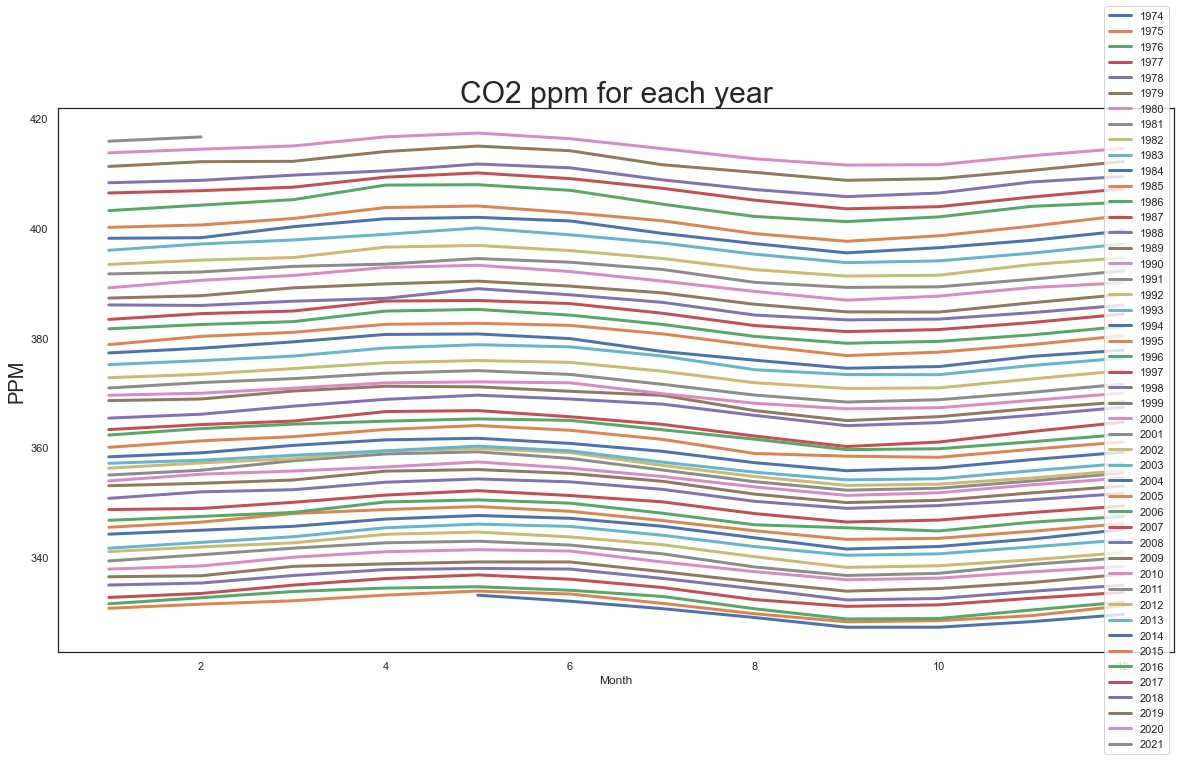

In [165]:
season = weekly
season['Date'] = weekly.Date
season['Year'] = weekly['Date'].dt.year
season['Month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'average', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 ppm for each year', fontsize = 30)
plt.ylabel('PPM', fontsize = 20)
plt.show()

In [170]:
weekly['ndays'].value_counts()

7    1055
6     643
5     398
4     176
3     101
2      36
0      18
1      14
Name: ndays, dtype: int64

In [200]:
weekly.loc[weekly['increase since 1800'] < 40].index.values

array(['1975-10-05T00:00:00.000000000', '1975-12-07T00:00:00.000000000',
       '1975-12-14T00:00:00.000000000', '1975-12-21T00:00:00.000000000',
       '1975-12-28T00:00:00.000000000', '1976-06-27T00:00:00.000000000',
       '1982-03-21T00:00:00.000000000', '1982-04-11T00:00:00.000000000',
       '1982-04-18T00:00:00.000000000', '1983-08-07T00:00:00.000000000',
       '1984-04-01T00:00:00.000000000', '1984-04-08T00:00:00.000000000',
       '1984-04-15T00:00:00.000000000', '1984-04-22T00:00:00.000000000',
       '2005-10-16T00:00:00.000000000', '2008-06-29T00:00:00.000000000',
       '2008-07-06T00:00:00.000000000', '2008-07-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [173]:
weekly.drop(columns = ['year', 'month', 'day', 'Year', 'Month', 'decimal', '1 year ago', '10 years ago'], inplace = True)

In [175]:
weekly.set_index('Date', inplace = True)

In [176]:
avg_week = weekly.copy()

In [177]:
avg_week.columns

Index(['average', 'ndays', 'increase since 1800'], dtype='object')

In [178]:
avg_week.value_counts()

average  ndays  increase since 1800
346.835  0      -999.99                4
387.070  0      -999.99                3
329.950  0      -999.99                3
344.245  0      -999.99                2
417.670  7       134.28                1
                                      ..
380.120  6       101.29                1
380.110  7       97.21                 1
380.100  5       99.21                 1
380.060  7       99.04                 1
326.720  6       49.95                 1
Length: 2433, dtype: int64

In [179]:
avg_week['average'].mean()

367.86187423187243

<AxesSubplot:xlabel='Date', ylabel='ppm'>

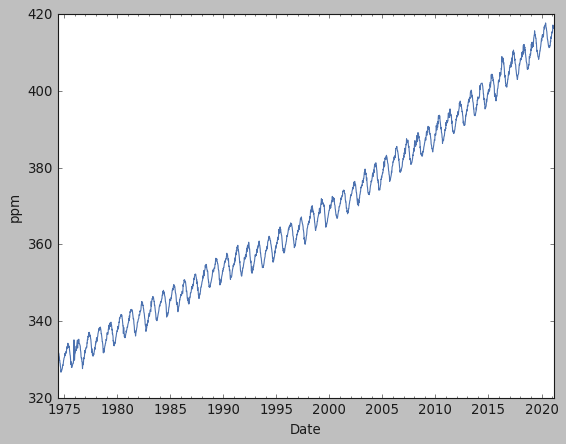

In [195]:
avg_week['average'].plot(ylabel = 'ppm')

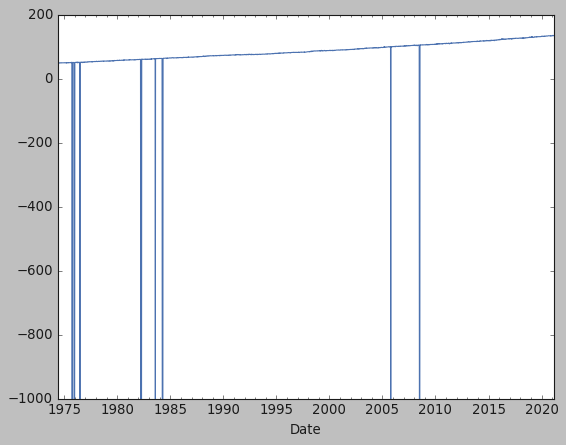

In [197]:
avg_week['increase since 1800'].plot();

In [198]:
season = weekly
season['Date'] = weekly.Date
season['Year'] = weekly['Date'].dt.year
season['Month'] = weekly['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'increase since 1800', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.legend(loc = 'right')
plt.title('CO2 ppm for each year', fontsize = 30)
plt.ylabel('PPM', fontsize = 20)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [184]:
month = avg_week['average'].resample('M').mean()
month_std = avg_week['average'].resample('M').std()


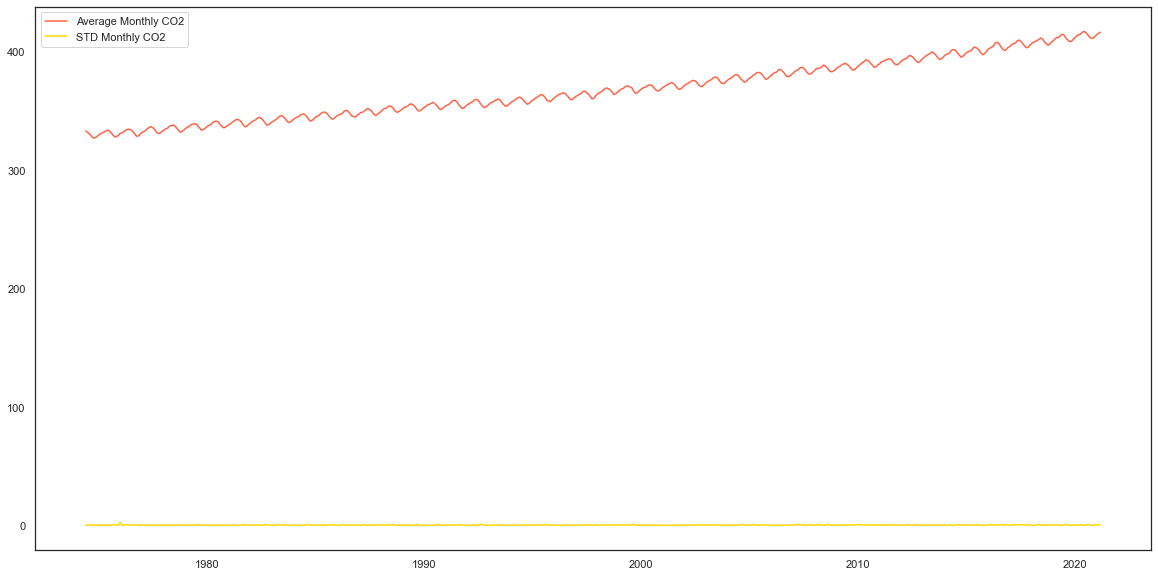

In [185]:
fig = plt.figure(figsize = (20,10))
plt.plot(month, color = 'tomato', label = 'Average Monthly CO2')
plt.plot(month_std, color = 'gold', label = 'STD Monthly CO2')
plt.legend(loc = 'best')
plt.show()

In [186]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(avg_week['average'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                    0.286789
p-value                           0.976730
#Lags Used                       27.000000
Number of Observations Used    2411.000000
dtype: float64


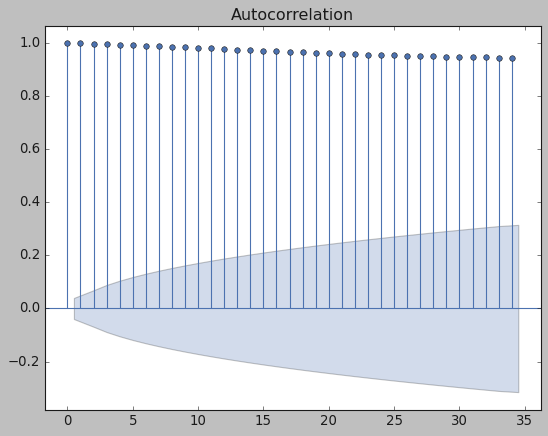

In [191]:
plot_acf(avg_week['average'][:-1], alpha=0.05);

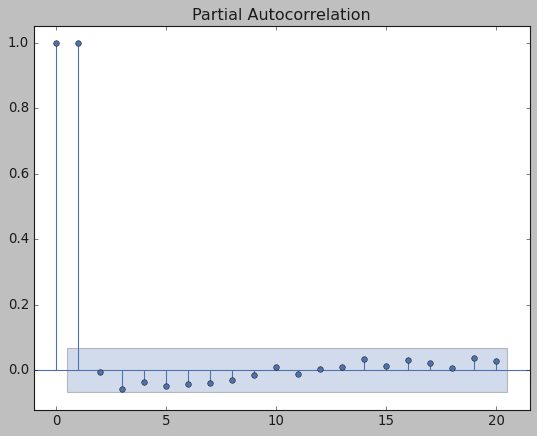

In [192]:
plot_pacf(avg_week['average'][:-1], alpha = 0.001, lags=20);